f0.001.pt.pt failed to converge.
f0.1.pt.pt failed to converge.
finish_factor1.pt.pt failed to converge.
finish_factor100.pt.pt failed to converge.
finish_factor1000.0.pt.pt failed to converge.
f_penalty10.pt.pt failed to converge.
f_penalty2.5.pt.pt failed to converge.
f_penalty25.pt.pt failed to converge.
f_reward0.1.pt.pt failed to converge.
f_reward10.pt.pt failed to converge.
s0.001.pt.pt failed to converge.
s0.1.pt.pt failed to converge.
s0.8.pt.pt failed to converge.
s1.pt.pt failed to converge.
s10.pt.pt failed to train.
s5.pt.pt failed to train.
u0.75.pt.pt failed to converge.
u10.pt.pt failed to train.
u5.pt.pt failed to train.


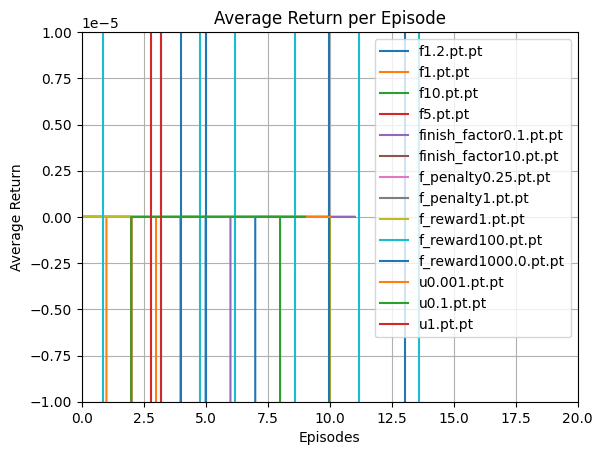

In [17]:
import torch
import os
import matplotlib.pyplot as plt


# Get folder path for grid search results.
folder_path = "C:\\Users\\nehir\\Documents\\Important\\Research\\SMART\\temporal_RLHF\\search_results\\logs"

# Iterate through folder.
for filename in os.listdir(folder_path):
    # Load logs.
    data = torch.load(os.path.join(folder_path, filename), weights_only=False)

    # If training crashed then the log will just say "ERROR", otherwise it will produce a log whose reward per episode may be plotted. However, models where zero reward was achieved are filtered out.
    if data == "ERROR":
        print(f"{filename} failed to train.")  # If a crash occurred.
    else:
        if set(data["return_per_episode"]) == {0}:
            print(f"{filename} failed to converge.")  # If no reward given.
        else:
            plt.plot(data["return_per_episode"], label=filename)

# Adjust plot settings and then display the plot.
plt.xlabel("Episodes")
plt.ylabel("Average Return")
#plt.ylim(-1e-5, 1e-5)
#plt.xlim(0, 20)
plt.title("Average Return per Episode")
plt.grid(True)
plt.legend()
plt.show()